<a href="https://colab.research.google.com/github/soundarya1992/My-Projects/blob/master/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
train = pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')

In [3]:
# getting their shapes
print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (54808, 14)
Shape of test : (23490, 13)


In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
# describing the training set

train.describe(include = 'all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

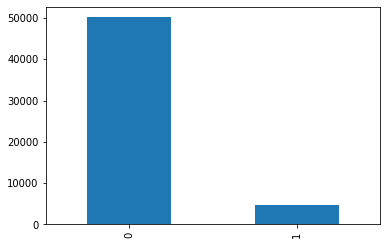

In [10]:
train['is_promoted'].value_counts().plot(kind='bar')

Data Pre-processing

In [11]:
# filling missing values

train['education'].fillna(train['education'].mode()[0], inplace = True)
train['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
train.isnull().sum().sum()

0

In [12]:
# filling missing values

test['education'].fillna(test['education'].mode()[0], inplace = True)
test['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
test.isnull().sum().sum()

0

In [13]:
# removing the employee_id column

train = train.drop(['employee_id'], axis = 1)

train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [14]:
# saving the employee_id

emp_id = test['employee_id']

# removing the employee_id column

Val = test.drop(['employee_id'], axis = 1)

Val.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [0]:
y = train['is_promoted']
X = train.drop(['is_promoted'],axis = 1)

In [16]:
# one hot encoding for the train set

X = pd.get_dummies(X)

X.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [0]:
Val = pd.get_dummies(Val)

In [18]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_sample, y_sample = SMOTE().fit_sample(X, y.values.ravel())

X_sample = pd.DataFrame(X_sample)
y_sample = pd.DataFrame(y_sample)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [19]:
# checking the sizes of the sample data
print("Size of x-sample :", X_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (100280, 58)
Size of y-sample : (100280, 1)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.2, random_state = 0)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_valid: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of X_train:  (80224, 58)
Shape of X_valid:  (20056, 58)
Shape of y_train:  (80224, 1)
Shape of y_valid:  (20056, 1)


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
Val = pca.transform(Val)

In [22]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train,y_train)
preds_DT_train = DTC.predict(X_train)
preds_DT_test = DTC.predict(X_test)
preds_DT_val = DTC.predict(Val)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
print('Train')
print('Acc ', accuracy_score(y_train, preds_DT_train))
print('f1 ', f1_score(y_train, preds_DT_train))
print('Classification report', classification_report(y_train, preds_DT_train))
print('Test')

print('Acc Test', accuracy_score(y_test, preds_DT_test))
print('f1 Test', f1_score(y_test, preds_DT_test))
print('Classification report', classification_report(y_test, preds_DT_test))


Train
Acc  0.9998753490227363
f1  0.9998751872191712
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40159
           1       1.00      1.00      1.00     40065

    accuracy                           1.00     80224
   macro avg       1.00      1.00      1.00     80224
weighted avg       1.00      1.00      1.00     80224

Test
Acc Test 0.9156860789788592
f1 Test 0.9168755837388783
Classification report               precision    recall  f1-score   support

           0       0.92      0.91      0.91      9981
           1       0.91      0.93      0.92     10075

    accuracy                           0.92     20056
   macro avg       0.92      0.92      0.92     20056
weighted avg       0.92      0.92      0.92     20056



In [23]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier()
RFC.fit(X_train,y_train)
preds_RF_train = RFC.predict(X_train)
preds_RF_test = RFC.predict(X_test)
#preds_RF_val = RFC.predict(Val)
print('Train')
print('Acc ', accuracy_score(y_train, preds_RF_train))
print('f1 ', f1_score(y_train, preds_RF_train))
print('Classification report', classification_report(y_train, preds_RF_train))
print('Test')

print('Acc Test', accuracy_score(y_test, preds_RF_test))
print('f1 Test', f1_score(y_test, preds_RF_test))
print('Classification report', classification_report(y_test, preds_RF_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train
Acc  0.9998753490227363
f1  0.999875212139363
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40159
           1       1.00      1.00      1.00     40065

    accuracy                           1.00     80224
   macro avg       1.00      1.00      1.00     80224
weighted avg       1.00      1.00      1.00     80224

Test
Acc Test 0.9649980055843638
f1 Test 0.9654016757023164
Classification report               precision    recall  f1-score   support

           0       0.97      0.96      0.96      9981
           1       0.96      0.97      0.97     10075

    accuracy                           0.96     20056
   macro avg       0.97      0.96      0.96     20056
weighted avg       0.97      0.96      0.96     20056



In [24]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
preds_XGB_train = xgb.predict(X_train)
preds_XGB_test = xgb.predict(X_test)
#preds_XGB_val = xgb.predict(Val)
print('Train')
print('Acc ', accuracy_score(y_train, preds_XGB_train))
print('f1 ', f1_score(y_train, preds_XGB_train))
print('Classification report', classification_report(y_train, preds_XGB_train))
print('Test')

print('Acc Test', accuracy_score(y_test, preds_XGB_test))
print('f1 Test', f1_score(y_test, preds_XGB_test))
print('Classification report', classification_report(y_test, preds_XGB_test))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train
Acc  0.8753490227363383
f1  0.8804942756758048
Classification report               precision    recall  f1-score   support

           0       0.91      0.83      0.87     40159
           1       0.84      0.92      0.88     40065

    accuracy                           0.88     80224
   macro avg       0.88      0.88      0.88     80224
weighted avg       0.88      0.88      0.88     80224

Test
Acc Test 0.873603909054647
f1 Test 0.8796010448824506
Classification report               precision    recall  f1-score   support

           0       0.91      0.83      0.87      9981
           1       0.84      0.92      0.88     10075

    accuracy                           0.87     20056
   macro avg       0.88      0.87      0.87     20056
weighted avg       0.88      0.87      0.87     20056



In [25]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
preds_LGB_train = lgb.predict(X_train)
preds_LGB_test = lgb.predict(X_test)
#preds_LGB_val = lgb.predict(Val)
print('Train')
print('Acc ', accuracy_score(y_train, preds_LGB_train))
print('f1 ', f1_score(y_train, preds_LGB_train))
print('Classification report', classification_report(y_train, preds_LGB_train))
print('Test')

print('Acc Test', accuracy_score(y_test, preds_LGB_test))
print('f1 Test', f1_score(y_test, preds_LGB_test))
print('Classification report', classification_report(y_test, preds_LGB_test))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train
Acc  0.9342964698843239
f1  0.9334562118897628
Classification report               precision    recall  f1-score   support

           0       0.92      0.95      0.94     40159
           1       0.94      0.92      0.93     40065

    accuracy                           0.93     80224
   macro avg       0.93      0.93      0.93     80224
weighted avg       0.93      0.93      0.93     80224

Test
Acc Test 0.9248105305145592
f1 Test 0.9244942920088124
Classification report               precision    recall  f1-score   support

           0       0.92      0.93      0.93      9981
           1       0.93      0.92      0.92     10075

    accuracy                           0.92     20056
   macro avg       0.92      0.92      0.92     20056
weighted avg       0.92      0.92      0.92     20056



In [27]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
preds_ETC_train = etc.predict(X_train)
preds_ETC_test = etc.predict(X_test)
preds_ETC_val = etc.predict(Val)
print('Train')
print('Acc ', accuracy_score(y_train, preds_ETC_train))
print('f1 ', f1_score(y_train, preds_ETC_train))
print('Classification report', classification_report(y_train, preds_ETC_train))
print('Test')

print('Acc Test', accuracy_score(y_test, preds_ETC_test))
print('f1 Test', f1_score(y_test, preds_ETC_test))
print('Classification report', classification_report(y_test, preds_ETC_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train
Acc  0.9998753490227363
f1  0.9998751872191712
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40159
           1       1.00      1.00      1.00     40065

    accuracy                           1.00     80224
   macro avg       1.00      1.00      1.00     80224
weighted avg       1.00      1.00      1.00     80224

Test
Acc Test 0.9706322297566813
f1 Test 0.9710778296096242
Classification report               precision    recall  f1-score   support

           0       0.98      0.96      0.97      9981
           1       0.96      0.98      0.97     10075

    accuracy                           0.97     20056
   macro avg       0.97      0.97      0.97     20056
weighted avg       0.97      0.97      0.97     20056



In [37]:
#Reading the submission file
submission = pd.read_csv('sample_submission_M0L0uXE.csv')

submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [38]:
# creating a dataframe with the employee id and their predicted promoted values{0, 1}

submission = pd.DataFrame({'employee_id': emp_id,'is_promoted': preds_ETC_val})

submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [40]:

# saving the submission file

filename = 'submission.csv'
submission.to_csv(filename, index = False)

print("Saved File : ", filename)


Saved File :  submission.csv


In [0]:
# standard scaling

#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test  = sc.transform(x_test)
#x_valid = sc.transform(x_valid)